### The problem statement
The main task of this notebook is to build machine learning models and compare them, considering their ability to predict whether a person makes over 50k a year or not.

### 1.Import libraries

In [9]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, balanced_accuracy_score, accuracy_score, classification_report  
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC, NuSVC, SVR, NuSVR
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')


### 2.Read the dataset

In [10]:
income_df = pd.read_csv("./income_evaluation.csv")
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### 2.1 View dimensions of the dataset and data types of columns

In [11]:
#dimensions
print("Dimensions",income_df.shape)
print("\n")
#data types
print(income_df.info())

Dimensions (32561, 15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


From the above table, we can extract the following information:
* there are nine categorical features and six numeric features
* there are no missing values
* income column is the target variable 

#### 2.2 Given that some columns contain dashes, we will transform them in underscore in order to access them

In [12]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

income_df.columns = names

#### 2.3 Statistical measures

In [13]:
income_df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 3. Exploratory Data Analysis

#### 3.1 Visualization

sex bar chart


<AxesSubplot:>

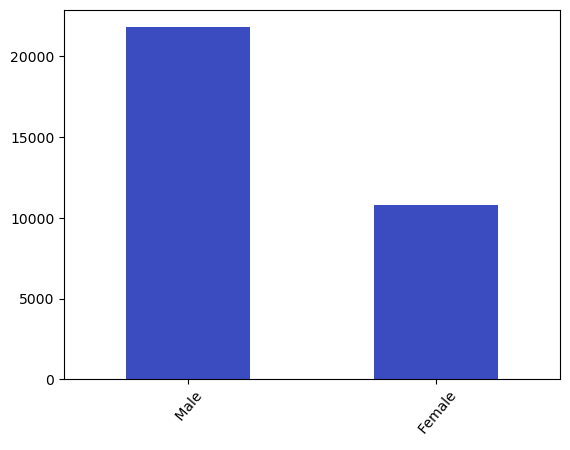

In [14]:
income_df['sex'].value_counts().plot(kind='bar', rot="50", colormap="coolwarm")

race bar chart


<AxesSubplot:>

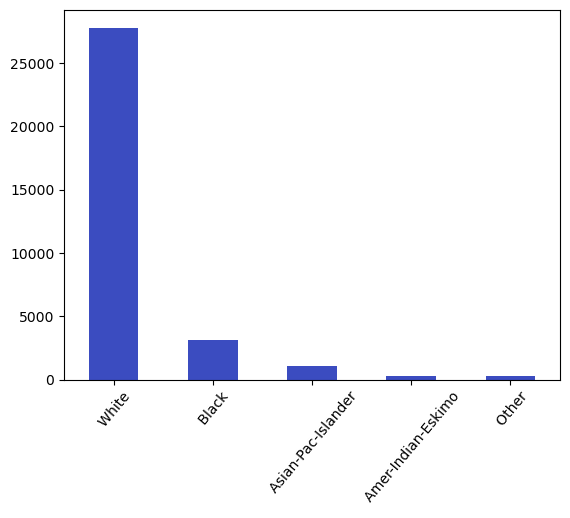

In [15]:
income_df['race'].value_counts().plot(kind='bar', rot="50", colormap="coolwarm")

occupation bar chart


<AxesSubplot:>

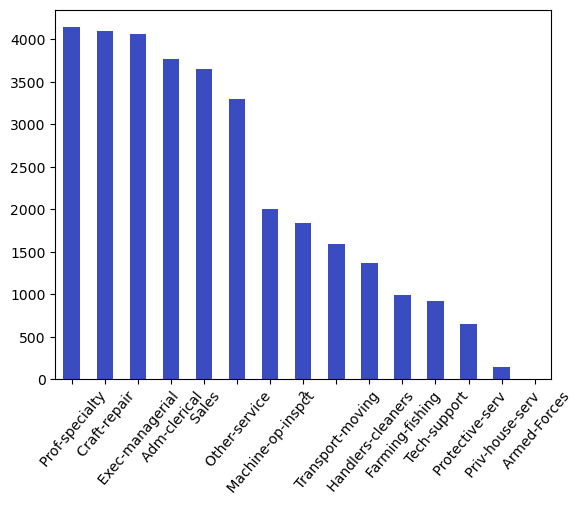

In [16]:
income_df['occupation'].value_counts().plot(kind='bar', rot="50", colormap="coolwarm")

education bar chart


<AxesSubplot:>

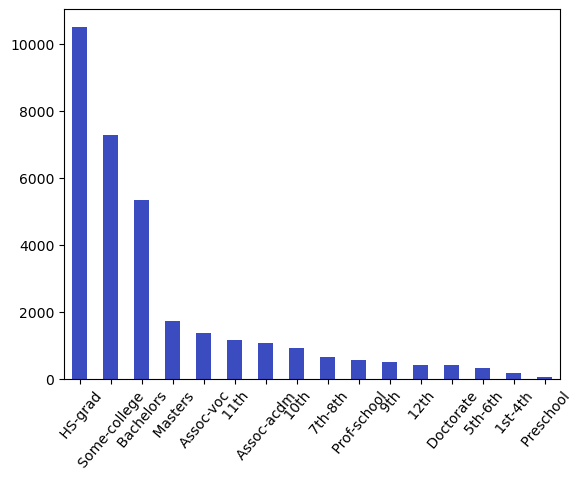

In [17]:
income_df['education'].value_counts().plot(kind='bar', rot="50", colormap="coolwarm")

workclass bar chart

<AxesSubplot:>

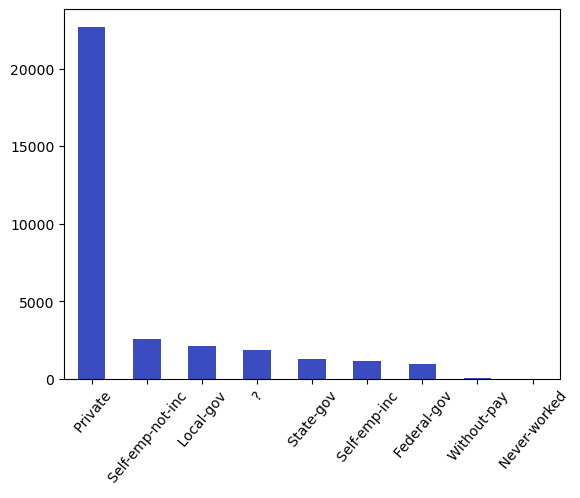

In [18]:
income_df['workclass'].value_counts().plot(kind='bar', rot="50", colormap="coolwarm")

native_country bar chart

<AxesSubplot:>

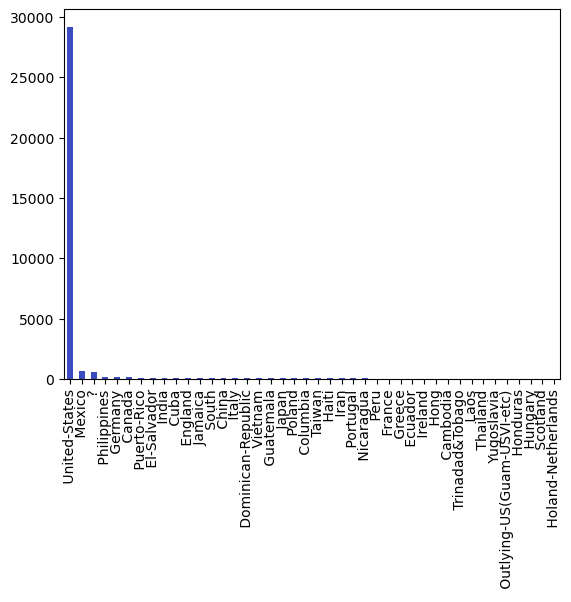

In [19]:
income_df['native_country'].value_counts().plot(kind='bar', rot="90",colormap="coolwarm")

Distribution of age variable

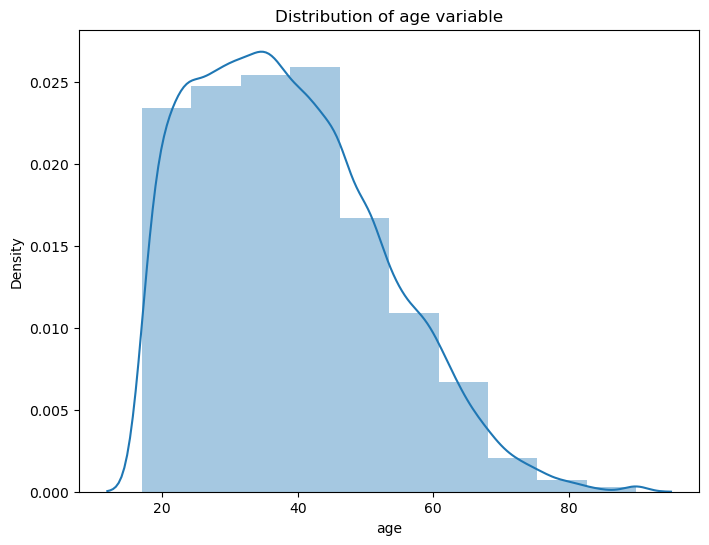

In [20]:
f, ax = plt.subplots(figsize=(8,6))
x = income_df['age']
sns.color_palette("hls", 8)
x = pd.Series(x, name="age")
ax = sns.distplot(x, bins=10)
ax.set_title("Distribution of age variable")
plt.show()

Group people who worked more than 40h in 3 categories

In [21]:
more_40 = income_df[(income_df['hours_per_week']>= 40) & (income_df['hours_per_week']< 50)]['hours_per_week']
more_50 = income_df[(income_df['hours_per_week']>= 50) & (income_df['hours_per_week'] < 60)]['hours_per_week']
more_60 = income_df[(income_df['hours_per_week']>= 60) & (income_df['hours_per_week'] < 70)]['hours_per_week']

In [22]:
pd.crosstab(more_40,income_df['income']).sum()
pd.crosstab(more_50,income_df['income']).sum()
pd.crosstab(more_60,income_df['income']).sum()

income
 <=50K    1020
 >50K      776
dtype: int64

### Analysis between the target variable and other explanatory variables

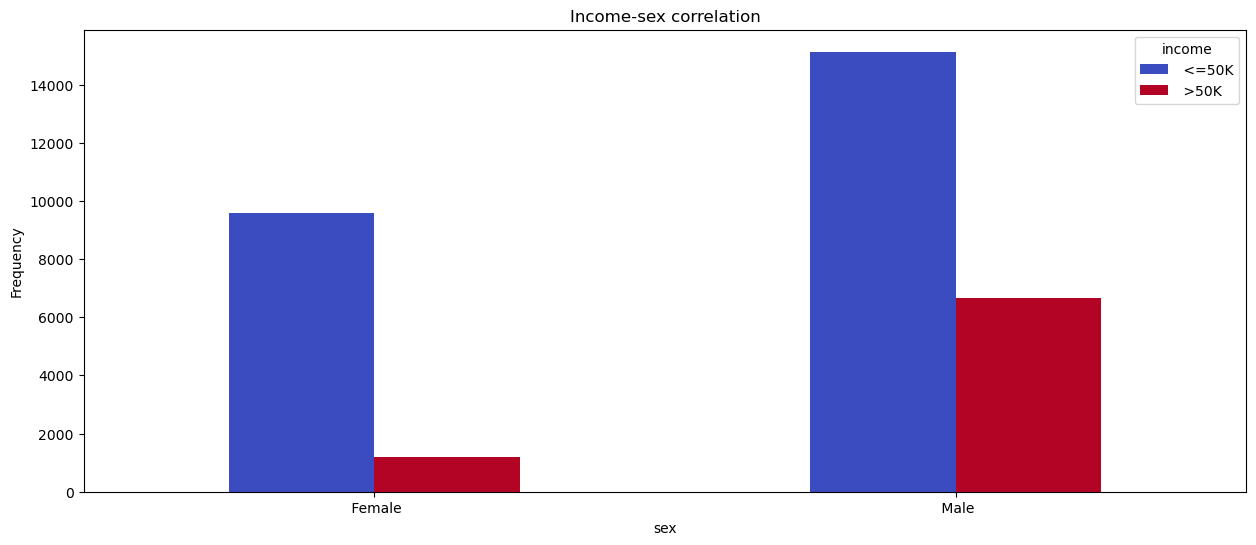

In [23]:
pd.crosstab(income_df['sex'],income_df['income']).plot(kind="bar",figsize=(15,6),colormap="coolwarm")
plt.title('Income-sex correlation')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

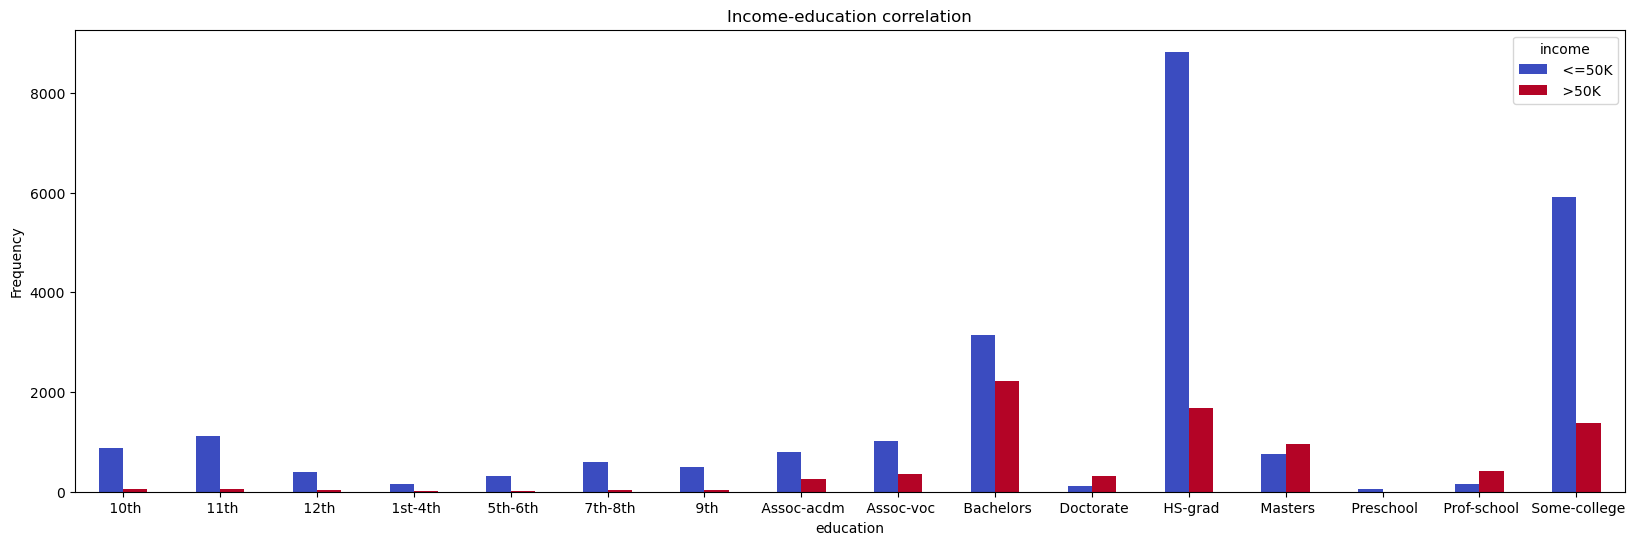

In [24]:
pd.crosstab(income_df['education'],income_df['income']).plot(kind="bar",figsize=(20,6), colormap="coolwarm")
plt.title('Income-education correlation')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

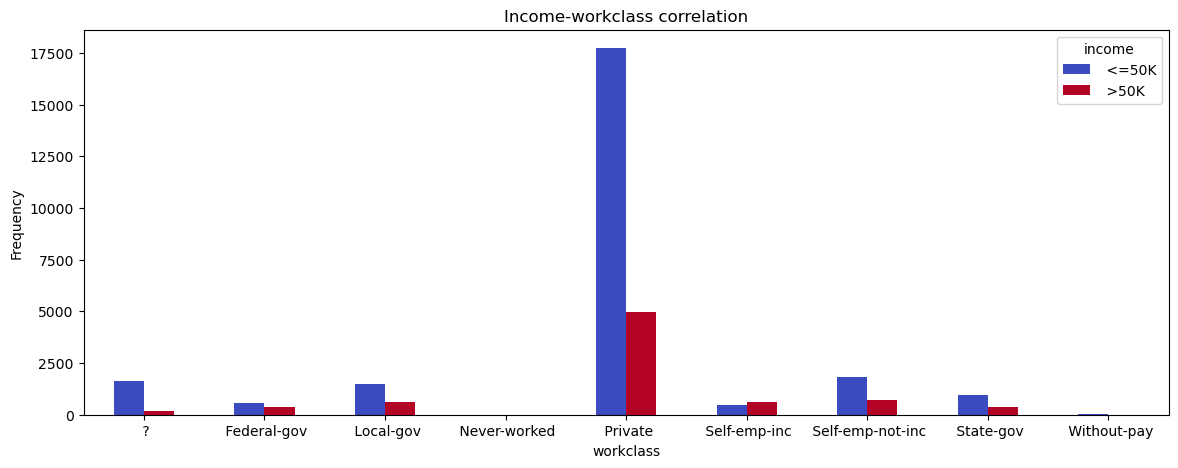

In [25]:
pd.crosstab(income_df['workclass'],income_df['income']).plot(kind="bar",figsize=(14,5), colormap="coolwarm")
plt.title('Income-workclass correlation')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

Relationship between age and income using a boxplot
Younger people make less money, which was expected. People earning less than 50k have a median of ~35 years and those earning more, a median of ~45.

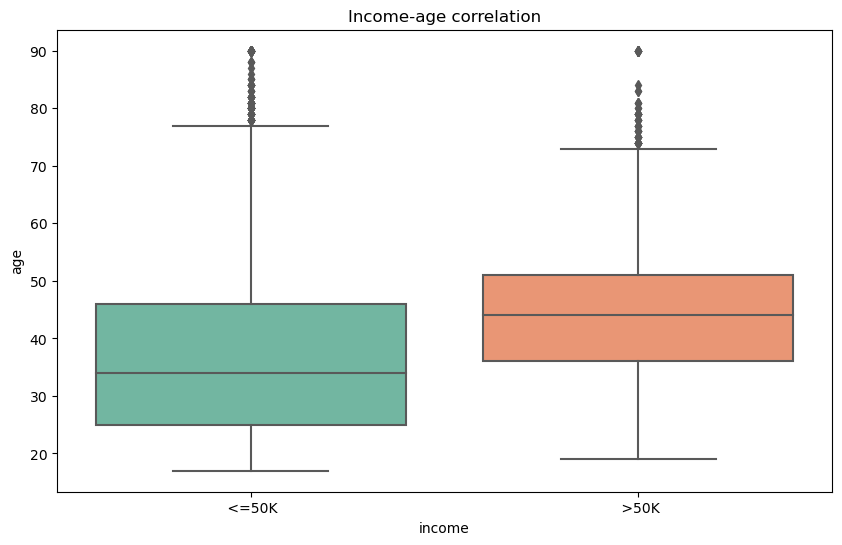

In [26]:
f, ax = plt.subplots(figsize=(10, 6))
sns.set_palette("Set2")
ax = sns.boxplot(x="income", y="age", data=income_df)
ax.set_title("Income-age correlation")
plt.show()

### 4. Feature engineering

#### 4.1 Missing values
A note to be made is that question mark appears many times throughout the observations. This is an encoder for missing values, but python didn't considered that because it looks for Nan or None. Thus, we will replace ? by Nan.

In [27]:
# strip the values of spaces
df_obj = income_df.select_dtypes(['object'])
income_df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [28]:
def remove_question_mark(dataset):
    for col in dataset.columns:
        dataset[col].replace('?', np.NaN, inplace=True)
    return dataset.info()    
remove_question_mark(income_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Now, we can observe that there are 3 columns that have missing values, all categorical. In this situation, imputation could have been a solution, using the Mode. But, from the charts we plotted, we can see that all 3 variables have a highly skewed ditribution. Replacing the missing values with the Mode would make the data even more imbalanced. Let's consider dropping the rows.

In [29]:
observations_0 = income_df.shape[0] 
income_df.dropna(inplace=True)
observations_1 = income_df.shape[0] 
print("Number of rows dropped: {}".format(observations_0-observations_1))

Number of rows dropped: 2399


The number of rows dropped is not a neglectable amount, but having in mind that we still have 30 000 observations and that the missing values couldn't have been imputed in a decent manner, we will proceed accordingly. 

##### First categorical feature to take into consideration is Marital status. It has 3 similar ‘married’ levels, these can be combined into one ‘married’ class.

In [30]:
income_df['marital_status'] = income_df['marital_status'].replace(["Married-civ-spouse", "Married-AF-spouse",  "Married-spouse-absent"], 'Married')

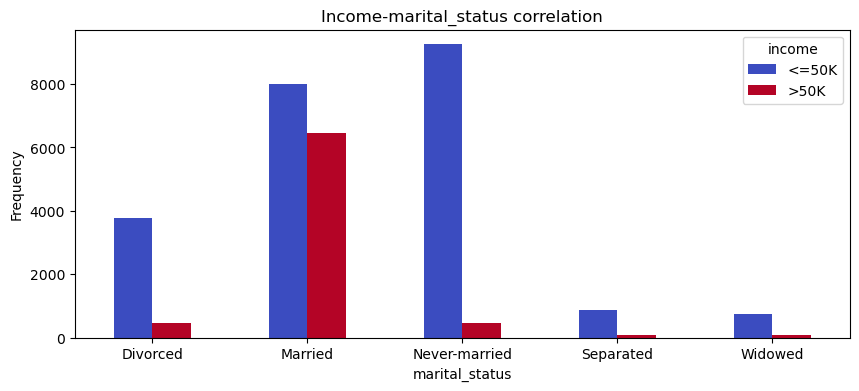

In [31]:
pd.crosstab(income_df['marital_status'],income_df['income']).plot(kind="bar",figsize=(10,4),colormap="coolwarm")
plt.title('Income-marital_status correlation')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [32]:
pd.crosstab(income_df['marital_status'],income_df['income'])

income,<=50K,>50K
marital_status,,
Divorced,3762,452
Married,8016,6440
Never-married,9256,470
Separated,873,66
Widowed,747,80


##### ‘Capital gain’ and ‘capital loss’ can be converted into one ‘capital’ variable which is calculated by subtracting capital loss from capital gain.

In [33]:
income_df["capital"] = income_df["capital_gain"] - income_df["capital_loss"]
income_df.drop(["capital_gain", "capital_loss"], inplace=True, axis=1)

##### There are not many individuals in each distinct native country category other than USA, therefore we bin them. Changing the ‘Native country’ levels to ‘USA’ or ‘Other’ will increase this attributes’ predictive power when modelling.

In [34]:
income_df.loc[(income_df["native_country"] != 'United-States'),'native_country']='Other'

##### The ‘fnlwgt’ feature stands for final weight. It has no predictive power since it is a feature aimed to allocate similar weights to people with similar demographic characteristics. ‘Education’ is a label for ‘education_num’ (number of years of education). Both columns are dropped.

In [35]:
income_df.drop(["fnlwgt", "education"], inplace=True, axis=1)

##### The relationship variable has two similar values, wife and husband, which signals the same idea, of being a spouse.

In [36]:
income_df['relationship'] = income_df['relationship'].replace(["Husband", "Wife"], 'Spouse')

In [37]:
pd.crosstab(income_df['sex'],income_df['income'])

income,<=50K,>50K
sex,,
Female,8670,1112
Male,13984,6396


#### 4.2 Encode categorical variables

Drop label variable

In [38]:
income_df.loc[(income_df["income"] == '<=50K'),'income']= 0
income_df.loc[(income_df["income"] == '>50K'),'income']= 1
income_df["income"] = income_df["income"].astype(int)
label = income_df["income"]
income_df.drop("income", inplace=True, axis=1)

Encode binary variable "Sex"

In [39]:
income_df.loc[(income_df["sex"] == 'Female'),'sex']= 0
income_df.loc[(income_df["sex"] == 'Male'),'sex']= 1
income_df["sex"] = income_df["sex"].astype(int)

Correlation plot

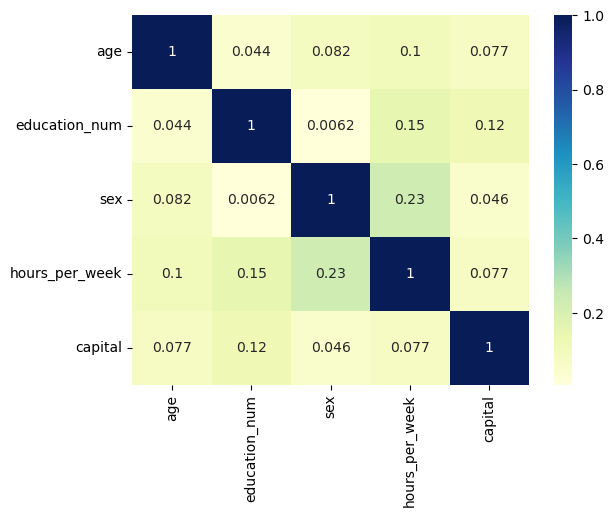

In [40]:
dataplot = sns.heatmap(income_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [41]:
df_encoded = pd.get_dummies(income_df)
df_encoded

,age,education_num,sex,hours_per_week,capital,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Own-child,relationship_Spouse,relationship_Unmarried,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native_country_Other,native_country_United-States
0,39,13,1,40,2174,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,50,13,1,13,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2,38,9,1,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,53,7,1,40,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,28,13,0,40,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,38,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
32557,40,9,1,40,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
32558,58,9,0,40,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
32559,22,9,1,20,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


#### 4.3 Feature Scaling
##### Since the data doesn't follow a Gaussian distribution, we'll use normalize instead of standardization.

In [42]:
scaler = MinMaxScaler()
df_encoded[['age', 'hours_per_week', "capital", "education_num" ]] = scaler.fit_transform(df_encoded[['age', 'hours_per_week', "capital", "education_num" ]])
df_encoded

,age,education_num,sex,hours_per_week,capital,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Own-child,relationship_Spouse,relationship_Unmarried,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native_country_Other,native_country_United-States
0,0.301370,0.800000,1,0.397959,0.062575,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0.452055,0.800000,1,0.122449,0.041742,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
2,0.287671,0.533333,1,0.397959,0.041742,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0.493151,0.400000,1,0.397959,0.041742,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0.150685,0.800000,0,0.397959,0.041742,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,0.733333,0,0.377551,0.041742,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
32557,0.315068,0.533333,1,0.397959,0.041742,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
32558,0.561644,0.533333,0,0.397959,0.041742,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
32559,0.068493,0.533333,1,0.193878,0.041742,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1


### 5. Building the classification model

For this task we've settled on trying the following machine learning algorithms and choosing the best one based on various performance metrics: 
* Multylayer Perceptron (MLP) 
* Logistic Regression 
* Support-vector Machine (SVM)
* Decision Trees 

#### Train-Test split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, label, test_size=0.2)


### 6.1 Decision Trees

#### 6.1.1 Tuning a simple Decision Tree model 
First I will be running the algorithm on the entire data set to see if it is capable of learning the model:

Accuracy of the overfitted model is:  0.9748358862144421


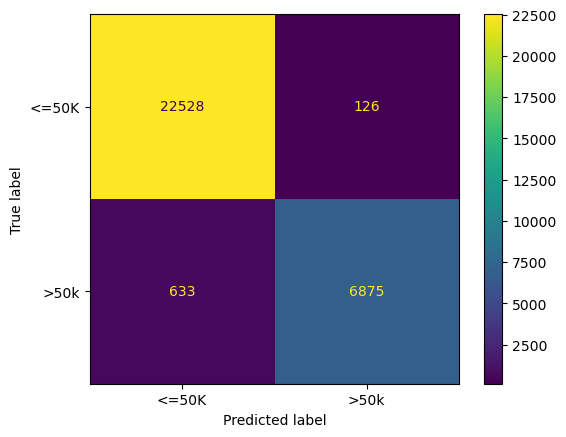

In [44]:
tree_model_overfitted = tree.DecisionTreeClassifier(max_depth = 2000 ) 
tree_model_overfitted.fit(df_encoded, label) 
print("Accuracy of the overfitted model is: ",accuracy_score(tree_model_overfitted.predict(df_encoded), label))   
plot_confusion_matrix(tree_model_overfitted, df_encoded, label, display_labels = ['<=50K', '>50k'])

I can see that the accuracy is in the vecinity of one, so the algorithm in itself is capable of capturing the relationship between the predicted label and the predictors. 
While there are misclassified samples, they are in the threshold that can be attributed to noise in the data.

Next i will be searching for optimal pruning hyperparameters using a five-fold cross-validation approach and utilising the mean accuracy of the folds as a comparison metric.


In [45]:
tree_max_depth = range(1,20) 
cross_validation_scores = np.zeros((len(tree_max_depth)+1))
for depth in tree_max_depth: 
    tree_model = tree.DecisionTreeClassifier(max_depth = depth) 
    cross_validation_scores[depth] = np.mean(cross_val_score(tree_model, df_encoded, label, cv=5))

The maximum accuracy of  0.854983356349978 related to max_depth is met in the  10  point.


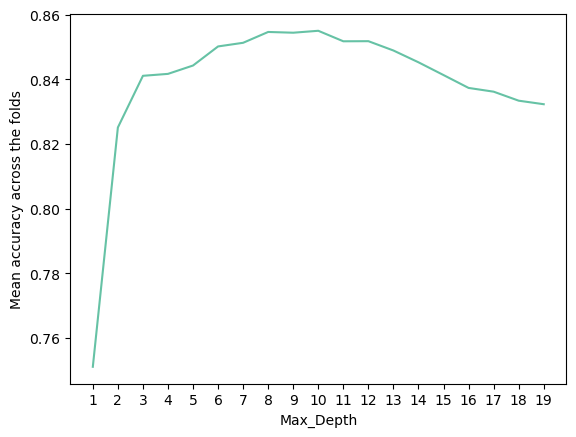

In [46]:
max_accuracy_depth_idx = np.argmax(cross_validation_scores)
print("The maximum accuracy of ",cross_validation_scores[max_accuracy_depth_idx] ,"related to max_depth is met in the ",max_accuracy_depth_idx, " point.")   
plt.xticks(list(tree_max_depth)) 
plt.ylabel("Mean accuracy across the folds") 
plt.xlabel("Max_Depth")
plt.plot(list(tree_max_depth), cross_validation_scores[1:])   

The first pruning approach of limiting the maximum depth for the tree produced the best results around the 10 depth point.

                 <=50K         >50k  accuracy    macro avg  weighted avg
precision     0.870229     0.781991  0.854799     0.826110      0.848714
recall        0.949584     0.560843  0.854799     0.755213      0.854799
f1-score      0.908176     0.653207  0.854799     0.780691      0.846008
support    4562.000000  1471.000000  0.854799  6033.000000   6033.000000


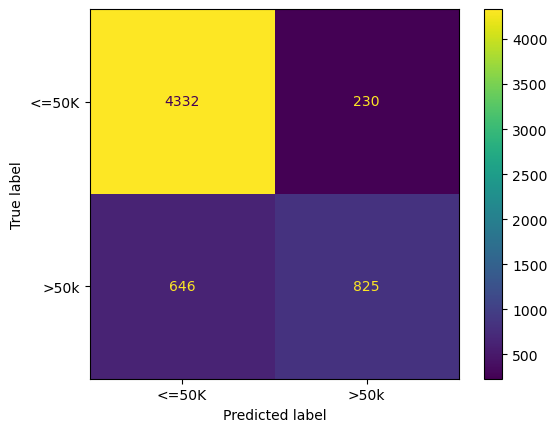

In [47]:
tree_model_max_depth = tree.DecisionTreeClassifier(max_depth = max_accuracy_depth_idx)  
tree_model_max_depth.fit(X_train, y_train)  
plot_confusion_matrix(tree_model_max_depth, X_test, y_test, display_labels = ['<=50K', '>50k'])  
tree_max_depth_report = classification_report(y_test, tree_model_max_depth.predict(X_test), target_names = ['<=50K', '>50k'], digits=4, output_dict=True)
print(pd.DataFrame(tree_max_depth_report))

In [48]:
tree_max_leaf_count = range(2,1000) 
cross_validation_scores = np.zeros((len(tree_max_leaf_count)+2))
for leaf_count in tree_max_leaf_count: 
    tree_model = tree.DecisionTreeClassifier(max_leaf_nodes = leaf_count) 
    cross_validation_scores[leaf_count] = np.mean(cross_val_score(tree_model, df_encoded, label, cv=5))

The maximum accuracy of  0.859426035891896 related to max_leaf is met in the  135  point.


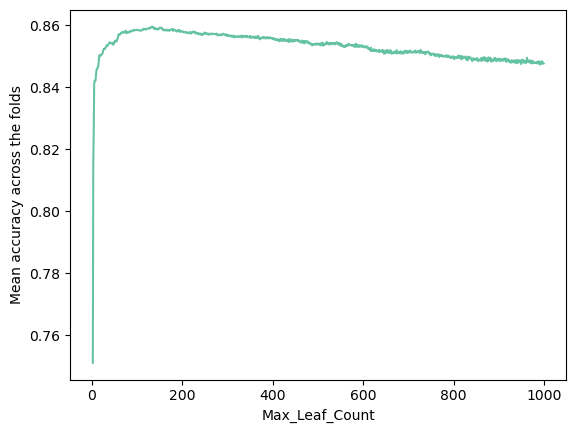

In [49]:
max_accuracy_leafs_idx = np.argmax(cross_validation_scores)
print("The maximum accuracy of ",cross_validation_scores[max_accuracy_leafs_idx] ,"related to max_leaf is met in the ",max_accuracy_leafs_idx, " point.")   
plt.ylabel("Mean accuracy across the folds") 
plt.xlabel("Max_Leaf_Count")
plt.plot(list(tree_max_leaf_count), cross_validation_scores[2:])  

                 <=50K         >50k  accuracy    macro avg  weighted avg
precision     0.891122     0.756563  0.863086     0.823843      0.858313
recall        0.932924     0.646499  0.863086     0.789712      0.863086
f1-score      0.911544     0.697214  0.863086     0.804379      0.859285
support    4562.000000  1471.000000  0.863086  6033.000000   6033.000000


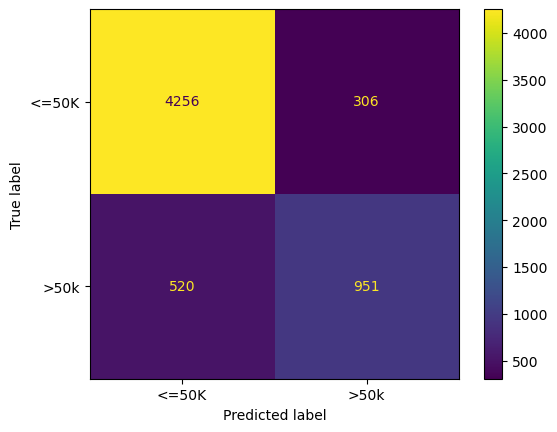

In [50]:
tree_model_max_leaf = tree.DecisionTreeClassifier(max_leaf_nodes = max_accuracy_leafs_idx)  
tree_model_max_leaf.fit(X_train, y_train)  
plot_confusion_matrix(tree_model_max_leaf, X_test, y_test, display_labels = ['<=50K', '>50k'])  
tree_max_leaf_report = classification_report(y_test, tree_model_max_leaf.predict(X_test), target_names = ['<=50K', '>50k'], digits=4,output_dict=True)
print(pd.DataFrame(tree_max_leaf_report))

The second pruning approach by limiting the number of leafs that the tree can build is more fine grained (and more computationally expensive to check) but it only produced a 0.005 improvement in accuracy. 
While the accuracy improvement is not notable, there can be seen a slight improvement in the less representated classes recall (<50k) 

#### 6.2. Ensemble learning 
Next I will try to further improve the model by employing ensemble learning techniques which use the Tree Classifier model as a weak learner.  
I will use the same five-fold cross-validation methodology that's been used in the past chapter in order to assess the model's performance.


##### 6.2.1. Bagging

In [57]:
tree_max_depth = range(1,20) 
bagging_cross_validation_scores = np.zeros((len(tree_max_depth)+1))
for depth in tree_max_depth: 
    bagging_model = RandomForestClassifier(max_depth = depth, n_estimators = 100, max_features = X_train.iloc[0].size,random_state=3125)
    bagging_cross_validation_scores[depth] = np.mean(cross_val_score(bagging_model, df_encoded, label, cv=5))

The maximum accuracy of  0.8609510919386345 related to max_depth is met in the  13  point.


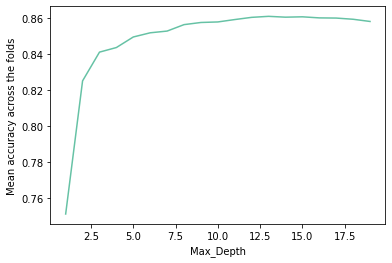

In [58]:
max_accuracy_depth_idx = np.argmax(bagging_cross_validation_scores)
print("The maximum accuracy of ",bagging_cross_validation_scores[max_accuracy_depth_idx] ,"related to max_depth is met in the ",max_accuracy_depth_idx, " point.")   
plt.ylabel("Mean accuracy across the folds") 
plt.xlabel("Max_Depth")
plt.plot(list(tree_max_depth), bagging_cross_validation_scores[1:])   

                 <=50K         >50k  accuracy    macro avg  weighted avg
precision     0.884003     0.767701  0.859771     0.825852      0.854720
recall        0.935312     0.635286  0.859771     0.785299      0.859771
f1-score      0.908934     0.695245  0.859771     0.802090      0.855131
support    4514.000000  1519.000000  0.859771  6033.000000   6033.000000


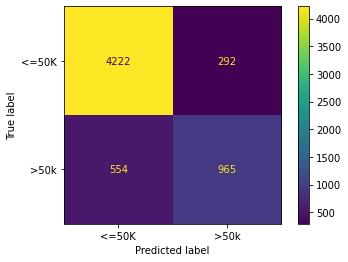

In [59]:
bagging_model = RandomForestClassifier(max_depth = max_accuracy_depth_idx, n_estimators = 100, max_features = X_train.iloc[0].size,random_state=3125)
bagging_model.fit(X_train, y_train) 
plot_confusion_matrix(bagging_model, X_test, y_test, display_labels = ['<=50K', '>50k'])  
bagging_report = classification_report(y_test, bagging_model.predict(X_test), target_names = ['<=50K', '>50k'], digits=4, output_dict=True)
print(pd.DataFrame(bagging_report))

##### 6.2.2. Random Forests

In [60]:
forest_max_depth = range(10,20)  
forest_max_features = range(1, X_train.iloc[0].size,3)  
forest_cross_validation_scores = np.zeros((np.max(forest_max_depth)+1,X_train.iloc[0].size+1))
for depth in forest_max_depth:  
    for features in forest_max_features:
        forest_model = RandomForestClassifier(max_depth = depth, n_estimators = 100, max_features = features ,random_state=3125)
        forest_cross_validation_scores[depth][features] = np.mean(cross_val_score(forest_model, df_encoded, label, cv=5))

In [61]:
print("The maximum score across the max_depth parameter and the max_features parameter is: ",np.max(forest_cross_validation_scores))

The maximum score across the max_depth parameter and the max_features parameter is:  0.8627414109664748


In [62]:
for idx,row in enumerate(forest_cross_validation_scores): 
    if np.max(row) == np.max(forest_cross_validation_scores): 
        idx_max = idx 
print(idx_max,np.argmax(forest_cross_validation_scores[idx_max]))

16 16


                 <=50K         >50k  accuracy    macro avg  weighted avg
precision     0.879214     0.780467  0.859606     0.829841      0.854351
recall        0.941737     0.615537  0.859606     0.778637      0.859606
f1-score      0.909402     0.688259  0.859606     0.798831      0.853722
support    4514.000000  1519.000000  0.859606  6033.000000   6033.000000


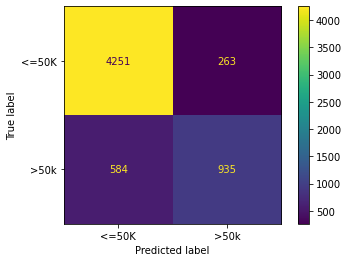

In [63]:
forest_model = RandomForestClassifier(max_depth = idx_max, n_estimators = 100, max_features = np.argmax(forest_cross_validation_scores[idx]) ,random_state=3125)
forest_model.fit(X_train, y_train) 
plot_confusion_matrix(forest_model, X_test, y_test, display_labels = ['<=50K', '>50k'])  
forest_report = classification_report(y_test, forest_model.predict(X_test), target_names = ['<=50K', '>50k'], digits=4, output_dict=True)
print(pd.DataFrame(forest_report))

##### 6.2.3. Gradient Boosting

In [ ]:
boosting_max_depth = range(5,20)  
boosting_learning_rate = [0.1,0.01,0.001]  
boost_scores = np.zeros((3,15))
for lrn_idx,learning_rate in enumerate(boosting_learning_rate): 
    for depth_idx,depth in enumerate(boosting_max_depth):   
        boosting_model  = GradientBoostingClassifier(learning_rate = learning_rate, n_estimators = 100, max_depth = depth)  
        boost_scores[lrn_idx][depth_idx] = np.mean(cross_val_score(boosting_model, df_encoded, label, cv=5))

In [ ]:
boost_lr = 0
for idx,row in enumerate(boost_scores): 
    if np.max(row) == np.max(boost_scores): 
        boost_lr = idx 
print(boosting_learning_rate[boost_lr],boosting_max_depth[np.argmax(boost_scores[boost_lr])])

0.1 6


                 <=50K         >50k  accuracy    macro avg  weighted avg
precision     0.894045     0.775495  0.868225     0.834770      0.864196
recall        0.934648     0.670836  0.868225     0.802742      0.868225
f1-score      0.913896     0.719379  0.868225     0.816637      0.864920
support    4514.000000  1519.000000  0.868225  6033.000000   6033.000000


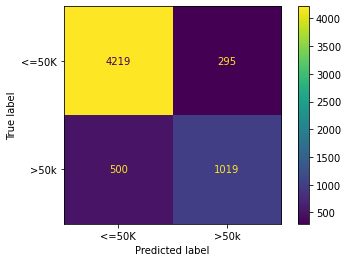

In [ ]:
boosting_model = GradientBoostingClassifier(learning_rate = boosting_learning_rate[boost_lr], n_estimators = 100, max_depth = boosting_max_depth[np.argmax(boost_scores[boost_lr])]) 
boosting_model.fit(X_train, y_train) 
plot_confusion_matrix(boosting_model, X_test, y_test, display_labels = ['<=50K', '>50k'])  
boosting_report = classification_report(y_test, boosting_model.predict(X_test), target_names = ['<=50K', '>50k'], digits=4, output_dict=True)
print(pd.DataFrame(boosting_report))

In [ ]:
accuracy_boos = boosting_report["accuracy"]
accuracy_forest = forest_report["accuracy"]
accuracy_tree_max_leaf = tree_max_leaf_report["accuracy"]

#### 6.3 Performance for trees methods

In [ ]:
print("Classification metrics for the different algorithms")
print("Tree pruned with max_depth:",tree_max_depth_report, sep = '\n') 
print("Tree pruned with max_leaf:",tree_max_leaf_report, sep = '\n')  
print("Bagging:",bagging_report, sep = '\n')  
print("Forest:",forest_report, sep = '\n') 
print("Boosting:",boosting_report, sep = '\n') 

Classification metrics for the different algorithms
Tree pruned with max_depth:
{'<=50K': {'precision': 0.8680244399185336, 'recall': 0.9441736818786, 'f1-score': 0.9044991511035654, 'support': 4514}, '>50k': {'precision': 0.7756010685663401, 'recall': 0.5734035549703752, 'f1-score': 0.659348978046934, 'support': 1519}, 'accuracy': 0.8508204873197415, 'macro avg': {'precision': 0.8218127542424369, 'recall': 0.7587886184244876, 'f1-score': 0.7819240645752497, 'support': 6033}, 'weighted avg': {'precision': 0.8447539109803633, 'recall': 0.8508204873197415, 'f1-score': 0.8427747829827261, 'support': 6033}}
Tree pruned with max_leaf:
{'<=50K': {'precision': 0.8903611882880957, 'recall': 0.9229065130704475, 'f1-score': 0.9063417817904927, 'support': 4514}, '>50k': {'precision': 0.7429837518463811, 'recall': 0.6622778143515471, 'f1-score': 0.7003132613992342, 'support': 1519}, 'accuracy': 0.8572849328692193, 'macro avg': {'precision': 0.8166724700672384, 'recall': 0.7925921637109973, 'f1-sco

Judging by the weighted accuracy average, the classification methods are fairly similar in performance, but given that this classification problem has imbalanced label counts, we should take a look at the unweighted statistics: 
There's a clear progression in unweighted f1 scores making me chose the boosting algorithm as the better fitted algorithm for this problem.

#### 6.3.1. Predictors 

Now that the best algorithm has been established, we can see what the most important predictors were:

In [ ]:
print(pd.Series(boosting_model.feature_importances_, index = df_encoded.columns).sort_values(ascending=False)[0:10])

relationship_Spouse           0.348509
capital                       0.251291
education_num                 0.200355
age                           0.062271
hours_per_week                0.040134
occupation_Exec-managerial    0.012880
marital_status_Married        0.009085
workclass_Self-emp-not-inc    0.008421
occupation_Prof-specialty     0.007920
sex                           0.007825
dtype: float64


The income class is most strongly corelated with having a spouse, the capital gain, education, age and hours worked per week while having a managerial ocupation, sex, self employment, speciality and working in the private sector also play a role.

### 7.Logistic Regression

#### 7.1 Declare the model and fit into train set 

In [ ]:
model_LR= LogisticRegression()

parameters_log = {
    'solver': ['liblinear', "saga"],
    'C': [0.1, 1, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [0.5, 0.2, 0.7]
    }

grid_log = GridSearchCV(model_LR, param_grid = parameters_log, scoring='accuracy', cv=5)
grid_log.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 0.01], 'l1_ratio': [0.5, 0.2, 0.7],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

#### 7.2 Predictions Logistic Regression

In [ ]:
print("Tuned Hyperparameters :", grid_log.best_params_)
print("Accuracy :",grid_log.best_score_)

y_pred_train_log = grid_log.predict(X_train)
y_pred_test_log = grid_log.predict(X_test)
accuracy_log = accuracy_score(y_test.to_list(), y_pred_test_log)

print("Accuracy on train data: {}".format(accuracy_score(y_train.to_list(), y_pred_train_log)))
print("Accuracy on test data: {}".format(accuracy_log))

Tuned Hyperparameters : {'C': 1, 'l1_ratio': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.8416429401192591
Accuracy on train data: 0.8425131584400514
Accuracy on test data: 0.8398806563898558


#### 7.3 Performance for Logistic Regression

In [ ]:
print("Test accuracy for Logistic Regression: ",accuracy_log)

Test accuracy for Logistic Regression:  0.8398806563898558


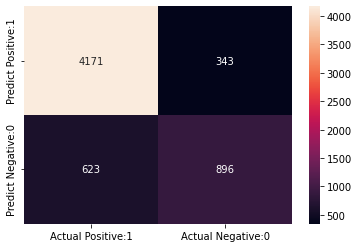

In [ ]:
cm_matrix_log = pd.DataFrame(data=confusion_matrix(y_test,y_pred_test_log), columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_log, annot=True, fmt='d')

### 8. Support Vector Algorithms

#### 8.1 Cross validation with SV algorithms


In [ ]:
pipelines = []

pipelines.append(('SVC', Pipeline([('SVC', SVC())])))
pipelines.append(('NuSVC', Pipeline([('NuSVC', NuSVC())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=5)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean()} (std: {cv_results.std()})"
    print(msg)
    
print(results)
print(names)

SVC: -0.17025132861937392 (std: 0.003669609202834415)
NuSVC: nan (std: nan)
[array([-0.16929134, -0.17157066, -0.17592209, -0.16991297, -0.16455959]), array([nan, nan, nan, nan, nan])]
['SVC', 'NuSVC']


#### 9.2. Support Vector Classifier¶


In [ ]:
svc_model = SVC()

parameters = {
    'kernel': ['rbf', 'linear', 'sigmoid', 'poly'],
    'C': [ 0.001, 0.1, 1]}

grid = GridSearchCV(svc_model, param_grid = parameters, scoring='accuracy', cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1],
                         'kernel': ['rbf', 'linear', 'sigmoid', 'poly']},
             scoring='accuracy')

#### 9.3. Performance for SVC


In [ ]:
print("Tuned Hyperparameters :", grid.best_params_)
print("Accuracy :",grid.best_score_)

y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)
accuracy_svc = accuracy_score(y_test.to_list(), y_pred_test)

print('Accuracy on train data: {}'.format(accuracy_score(y_train.to_list(), y_pred_train)))
print('Accuracy on test data: {}'.format(accuracy_svc))

Tuned Hyperparameters : {'C': 1, 'kernel': 'linear'}
Accuracy : 0.8394879205684236
Accuracy on train data: 0.8413527290811886
Accuracy on test data: 0.8417039615448367


#### 9.4 Confusion Matrix SVC

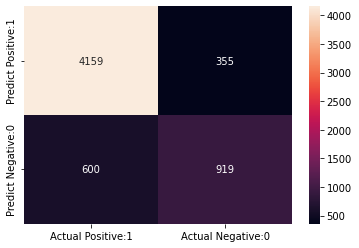

In [ ]:
cm_matrix_SVC = pd.DataFrame(data=confusion_matrix(y_test,y_pred_test), columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_SVC, annot=True, fmt='d')

In [ ]:
final_results = {"Accuracy": 
                 {"logisticRegression": round(accuracy_log,3),
                "SVC":round(accuracy_svc,3),
                "Boosting": round(accuracy_boos,3),
                "RandomForest":round(accuracy_forest,3),
                "DecisionTree":round(accuracy_tree_max_leaf,3)}}
print(pd.DataFrame(final_results))

                    Accuracy
Boosting               0.868
DecisionTree           0.857
RandomForest           0.860
SVC                    0.842
logisticRegression     0.840
